In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# read csv:
df = pd.read_csv('DataSets\insurance.csv')

# print head and tail
print("head: \n",df.head(3),"\n")
print("tail: \n",df.tail(3))

head: 
    age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620 

tail: 
       age     sex    bmi  children smoker     region     charges
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [4]:
# learn abt data:
print(df.describe())

# also use these:
print(df.describe(include='all'))
print(df.shape)
print(df.info)


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6

In [5]:
# contaians null values ??

print(df.isnull().all())
print(df.isnull().sum())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
# removing null:

# if we have null values in the numerical column we have to replace it with mean or median
# if we have null values in the categorical column we have to replace it with mode.

df['age'].fillna(df['age'].median(),inplace =True)

df['smoker'].fillna(df['smoker'].mode(),inplace =True)

In [7]:
# finding catagorical values:

print(df['region'].unique())
print(df['smoker'].unique())
print(df['sex'].unique())


['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']
<class 'numpy.ndarray'>


In [8]:
# n.of times they repeated: value_counts:

print(df.smoker.value_counts())
print(df.sex.value_counts())
print(df.region.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64
male      676
female    662
Name: sex, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [9]:
# correlation:

df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Visualizations:

### 1. Univarient:

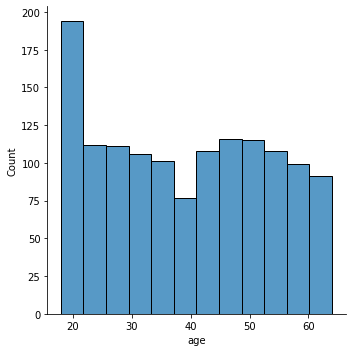

In [10]:
sns.displot(df.age)

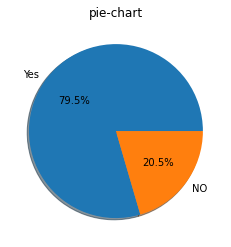

In [11]:
pie = plt.pie(df.smoker.value_counts(), labels=['Yes', 'NO'],autopct = "%1.1f%%", shadow=True)
plt.title('pie-chart')
plt.show()

<AxesSubplot:ylabel='region'>

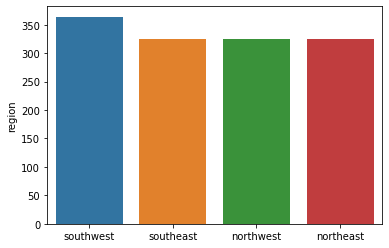

In [12]:
sns.barplot(x=df.region.unique(), y=df.region.value_counts())

$## Bivariant Analysis:

<AxesSubplot:xlabel='age', ylabel='charges'>

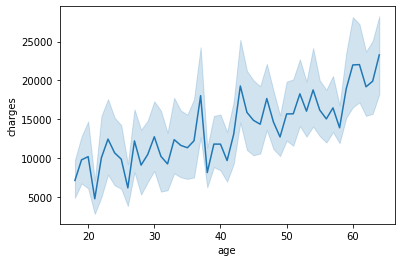

In [13]:
sns.lineplot(x=df.age, y=df.charges)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

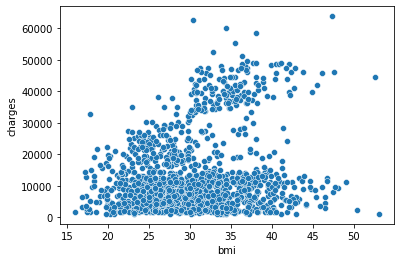

In [14]:
sns.scatterplot(x=df.bmi, y=df.charges)

### Multivariate analysis

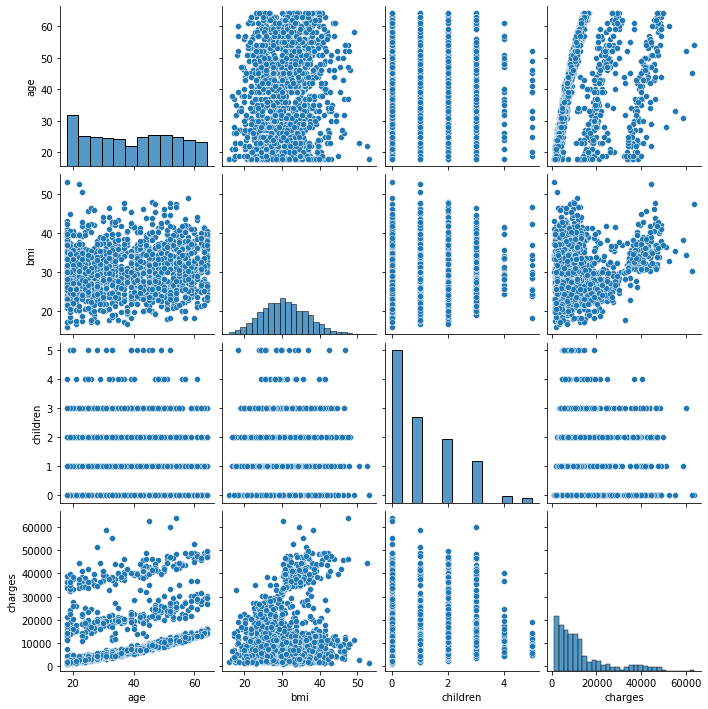

In [15]:
sns.pairplot(df)

<AxesSubplot:>

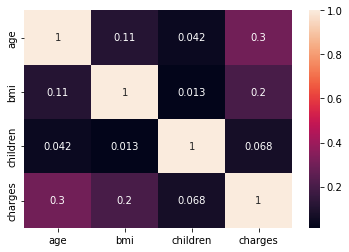

In [16]:
sns.heatmap(df.corr(), annot=True)

# OutLier Detection, removal and correction:

<AxesSubplot:>

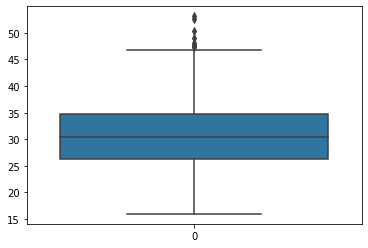

In [17]:
sns.boxplot(df.bmi)

<AxesSubplot:>

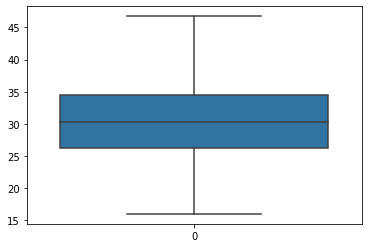

In [18]:
# Outlier removal using IQR:

q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)

iqr = q3-q1

upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

iqr_df = df[df.bmi<upper_limit]

sns.boxplot(iqr_df.bmi)

<AxesSubplot:>

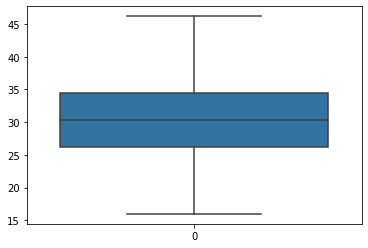

In [19]:
# Outlier removal using percentile:
pt = df.bmi.quantile(0.99)
percentile_df = df[df.bmi<=pt]

sns.boxplot(percentile_df.bmi)

<AxesSubplot:>

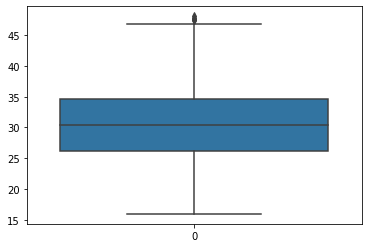

In [20]:
# Outlier removal using z-score:

from scipy import stats
bmi_zscore = stats.zscore(df.bmi)

df_zscore = df[np.abs(bmi_zscore)<=3]

sns.boxplot(df_zscore.bmi)

<AxesSubplot:>

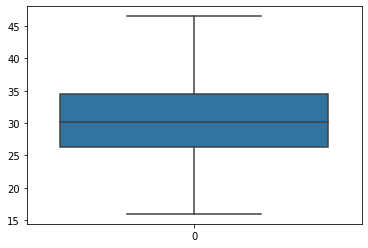

In [30]:
# Replacement with median/ mean:

q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)

iqr = q3-q1

upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr


df['bmi'] = np.where(df['bmi']>upper_limit,df.bmi.median,df['bmi'])
sns.boxplot(df.bmi)


# Encoding categorical Data

#### 3 types: 1. One Hot encoding 2. Label encoding 3. Manual encoding

In [27]:
"""
# One Hot Encoding

Florida     New York      California
   0           1               0
   0           0               1
   1           0               0
   0           1               0
   1           0               0

# Label encoding

Automatically lib will assign value to the text (values will be assigned based on the Alph. order.)

Florida, New York & California - 1,2,0

# Manual encoding

User defining the value for the text

"""

'\nOne Hot Encoding\n\nFlorida     New York      California\n   0           1               0\n   0           0               1\n   1           0               0\n   0           1               0\n   1           0               0\n\nLabel encoding\n\nAutomatically lib will assign value to the text (values will be assigned based on the Alph. order.)\n\nFlorida, New York & California - 1,2,0\n\nManual encoding\n\nUser defining the value for the text\n\n'

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['smoker'] = le.fit_transform(df['smoker'])
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Splitting the Data:

##### 1. splitting the data into independent(x) and dependaent(y)
##### 2. splitting the data into training(xtrain, ytrain) and testing(xtest, ytest)

###### imp point to be remembered: splitting data before Encoding is a good practice. (To reduce bias)

In [24]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [25]:
# splitting the data into dependent and independaent

x = df.iloc[:,0:6]
y = df['charges']

print(x.head(2), '\n')
print(y[0:2])

   age  sex    bmi  children  smoker  region
0   19    0  27.90         0       1       3
1   18    1  33.77         1       0       2 

0    16884.9240
1     1725.5523
Name: charges, dtype: float64


In [26]:
# splitting the data into training and testing

from sklearn.model_selection import train_test_split

xtrain, ytrain, xtest, ytest = train_test_split(x,y,test_size=0.25,random_state=10)

df.shape, xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1338, 7), (1003, 6), (1003,), (335, 6), (335,))